<a href="https://colab.research.google.com/github/MarceloClaro/python-business/blob/gh-pages/Avaliar_o_desempenho_de_um_aluno_usando_t%C3%A9cnicas_de_Machine_Learning_e_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AVALIAÇÃO DO DESEMPENHO DE ALUNOS**

# Instalções de Bibliotecas em Python.

In [29]:
# Bibliotecas para algumas operações básicas
import numpy as np
import pandas as pd

### Biblioteca dabl tem que ser instalado no Colab

In [30]:
pip install git+https://github.com/amueller/dabl/

  Cloning https://github.com/amueller/dabl/ to /tmp/pip-req-build-m74cqrt1
  Running command git clone -q https://github.com/amueller/dabl/ /tmp/pip-req-build-m74cqrt1
  Created wheel for dabl: filename=dabl-0.1.8-cp36-none-any.whl size=569084 sha256=6ed9d5c162cc47cfb92791e774ef64d37d56b61e9e90bbb47d1650d8490a6780
  Stored in directory: /tmp/pip-ephem-wheel-cache-b_55f0a5/wheels/a8/9f/dd/0db433c80ea11cc41e7fea0fd2e9b1b240068e64d6dce0c706
Successfully built dabl


In [36]:
# Biblioteca para visualizações
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

###Para ler o conjunto de dados:

In [49]:
data = pd.read_csv("/content/Students.csv",encoding='ISO-8859-1')

In [52]:
# obtendo a forma dos dados
print(data.shape)
# (quantidades de linhas ou dados, quantidades de colinas ou categorias)

(1000, 8)


###Para olhar para os primeiros 30 registros no conjunto de dados

In [56]:
data.head(30)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


###Estatísticas Descritivas

In [57]:
data.describe()
#count = Contagem total de linhas
#mean = Valor Médio
#std = Desvio Padrão
#min = Valor Mínimo
#25% = valor dos 25%
#50% = valor dos 50%
#75% = valor dos 75%
#max = Valor Máximo


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


###Vamos verificar o não de itens únicos presentes na coluna categórica.

In [58]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

###Vamos verificar a porcentagem de dados perdidos em cada coluna presente nos dados:

In [59]:
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


###Para ver a comparação de todos os outros atributos em relação às marcas matemáticas.

Target looks like regression


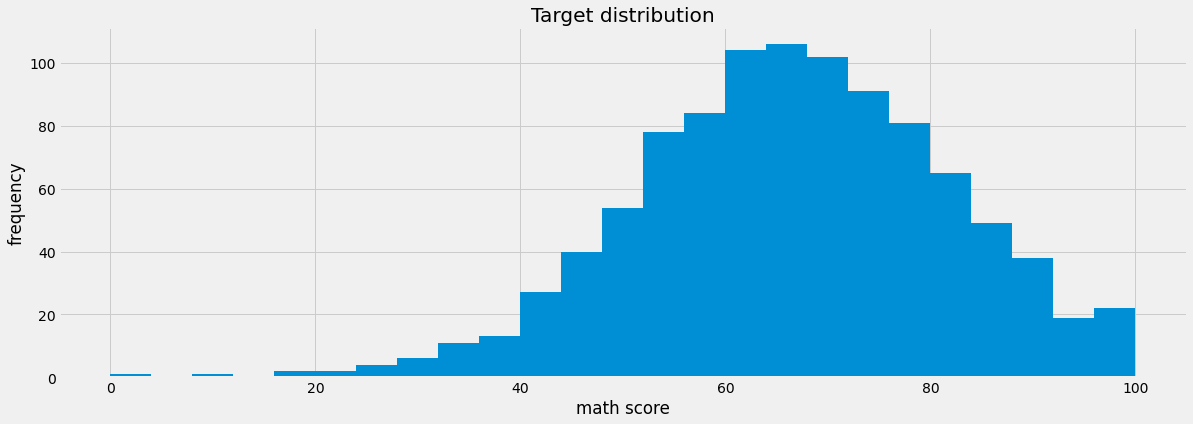

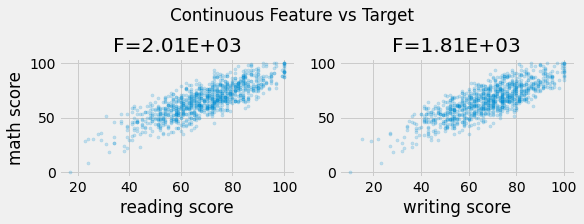

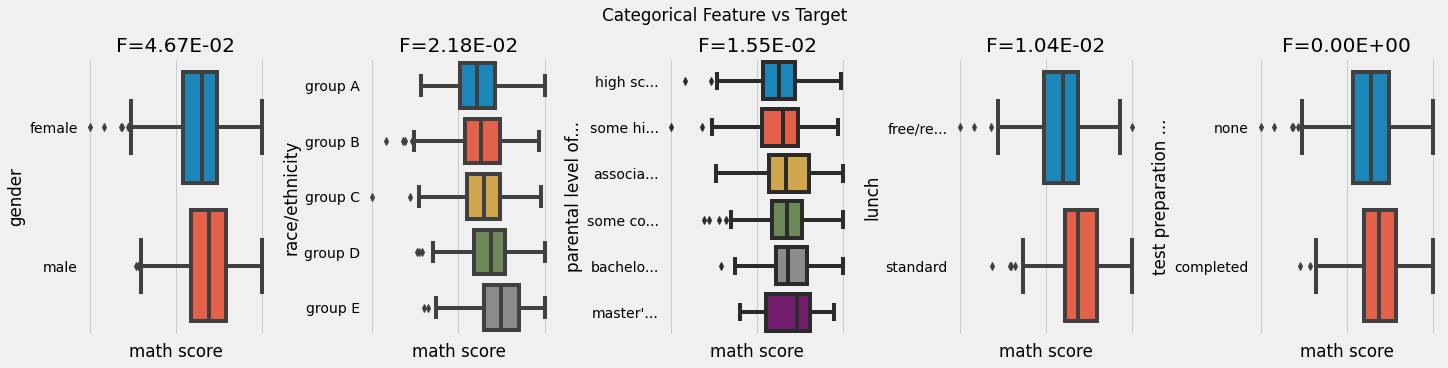

In [60]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

###Comparação de todos os outros atributos em relação às marcas de leitura :


Target looks like regression


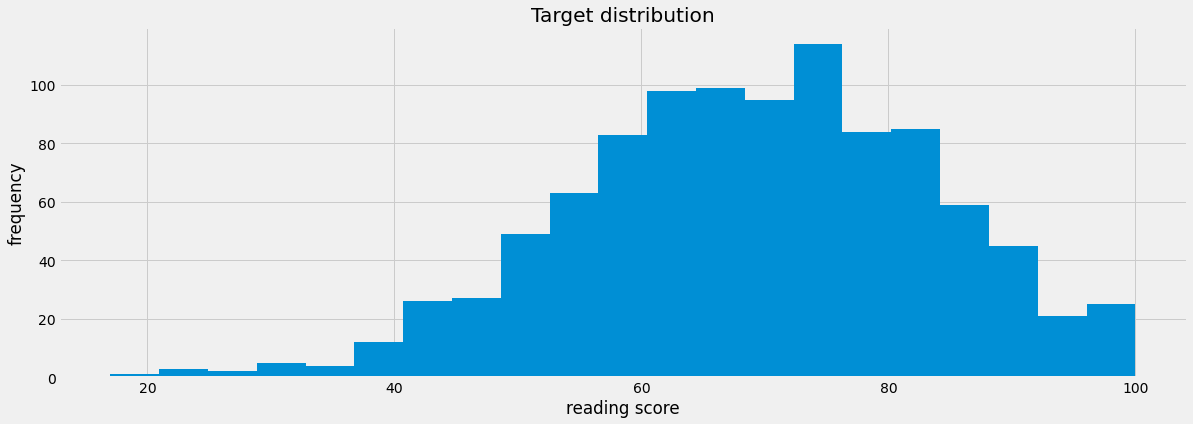

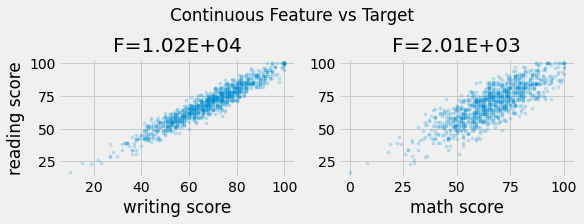

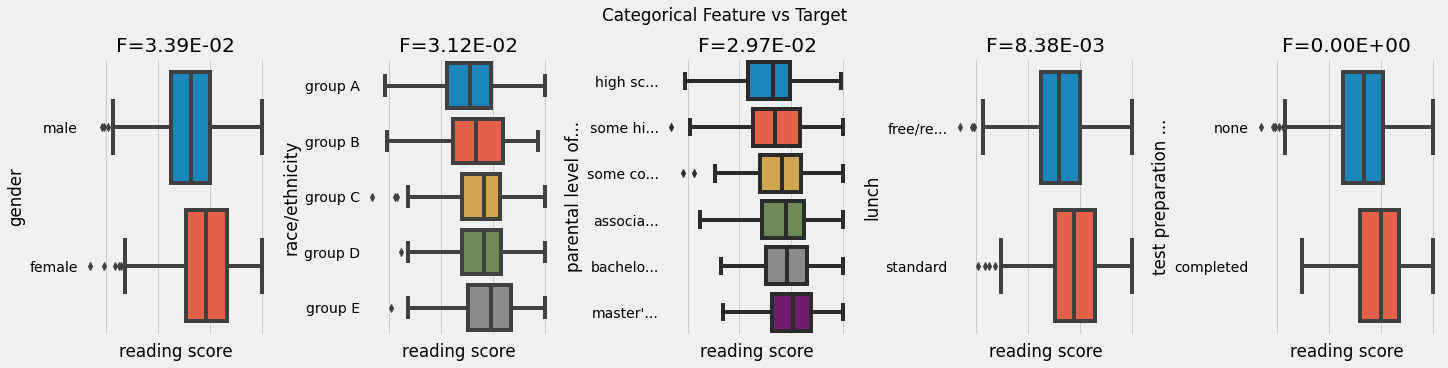

In [61]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

###Vamos verificar o efeito do almoço na performance do aluno:

In [62]:
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

###Vamos verificar o efeito do curso de preparação de testes em pontuações:



In [63]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

# Visualizações de dados
### Visualizando o número de homens e mulheres no conjunto de dados

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



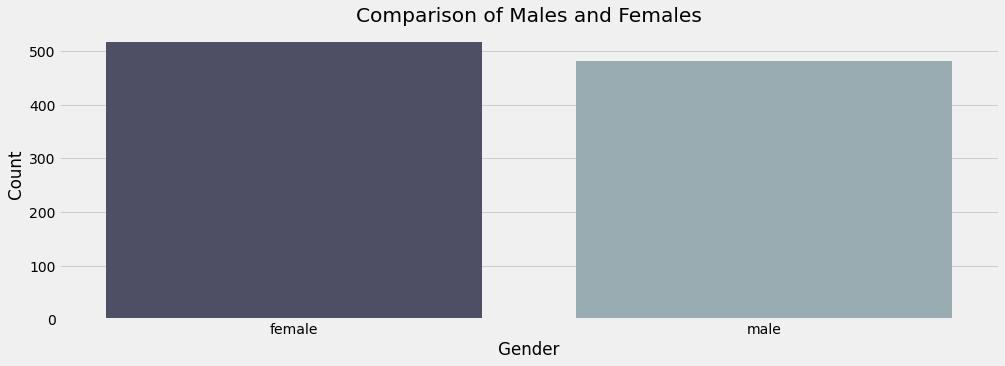

In [64]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Visualizando os diferentes grupos no conjunto de dados:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



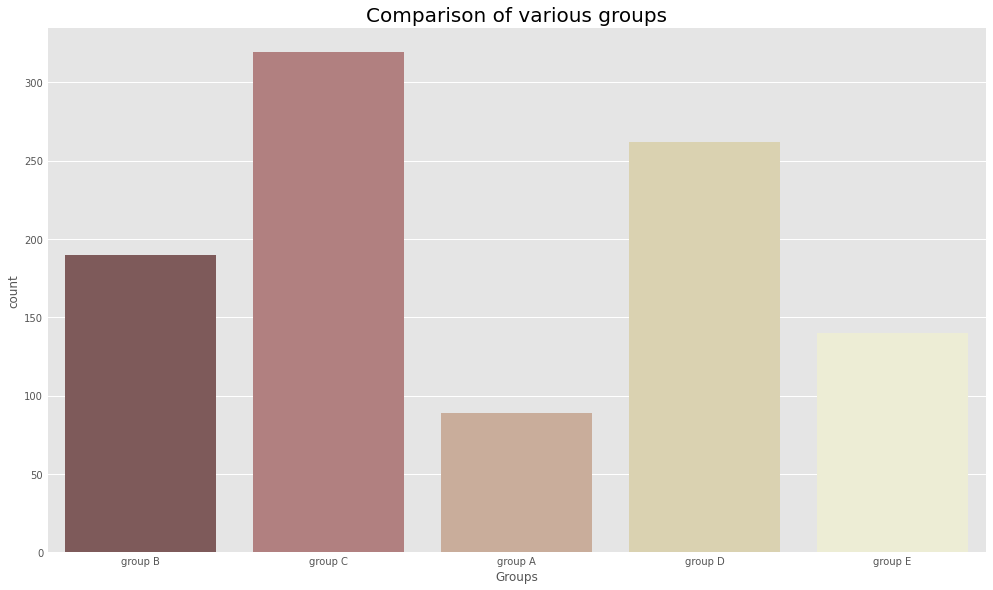

In [65]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

###Visualizando os diferentes níveis de educação parental:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



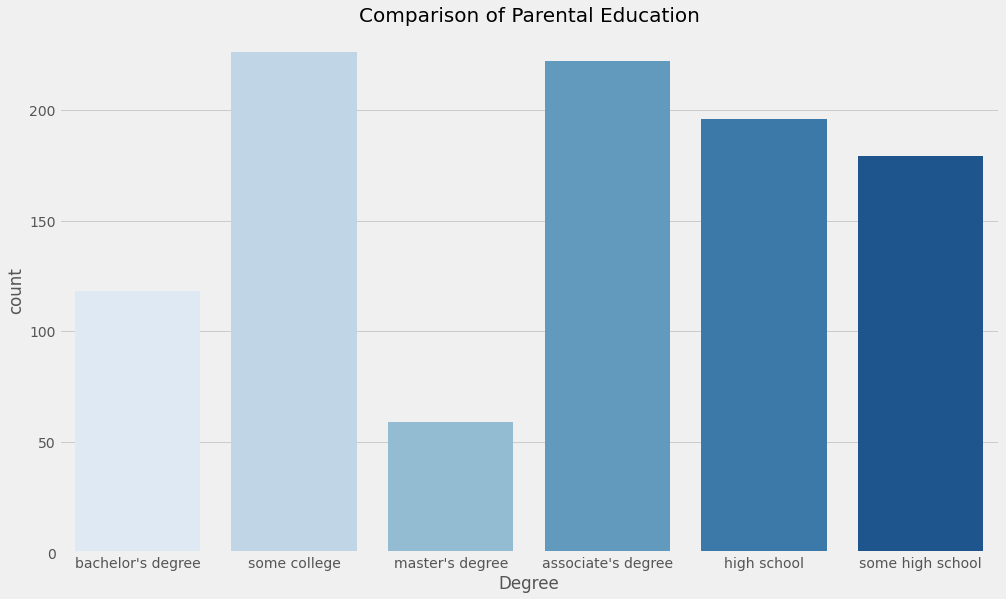

In [66]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()